# Assignment 2: Google Analytics Data and AB Test



### Contents of this Kernel

1. Problem Statement  
2. Dataset Understanding  
3. Exploration AB Test
 

## 1. Problem Statement 

In this exercise https://www.kaggle.com/c/ga-customer-revenue-prediction , the aim is to analyze a Google Merchandise Store (also known as GStore, where Google swag is sold) customer dataset to predict revenue per customer. The exercise here is an explosition of the data and look into the GA data about the personas of the visitors and the analysis might lead to a better use of marketing budgets for those companies who choose to use data analysis on top of GA data. 

One of the skill here is learn a simple python code on how to convert the JSON format data usually collected over webs, mobile applications and IoT log files into a python data framework for analysis. 

### Questions:

#### Propose A/B test experiments and formulate a hypothesis to test your obervations

As the first step, lets load the required libraries.


### Remember to download the text.csv (6G bit) from below link to the same directory for working in this Jupyter notebook exercises.

Since github does not allow to upload file more than 2Gbit, the data file is placed on my Google drive as follows:
https://drive.google.com/file/d/1euXsx5hfq0N5mowMyo3ecqEGcwzHalpT/view?usp=sharing


In [1]:
import numpy as np 
import pandas as pd 
import json
from pandas.io.json import json_normalize
import seaborn as sns 
import matplotlib.pyplot as plt 
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

If your PC does not have plotly, you need to find way to install plotly to call in init_notebook_mode, iplot, plotly.graph_objs and tools

## 2. Understanding the Dataset

The data is shared in csv format. The csv files contains some filed with json objects. The description about dataset fields is given  https://www.kaggle.com/c/ga-customer-revenue-prediction/data 



### 2.1 Dataset Preparation

Lets read the dataset in csv format and unwrap the json fields. Students can reference on https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html 
and
https://www.kaggle.com/julian3833/1-quick-start-read-csv-and-flatten-json-fields

In [2]:
# read in data

df = pd.read_csv("test.csv", nrows=10000)
df.shape

(10000, 13)

In [3]:
# See the variables 
df.head()


,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,"[{'index': '4', 'value': 'APAC'}]",20180511,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7460955084541987166,"{""continent"": ""Asia"", ""subContinent"": ""Souther...","[{'hitNumber': '1', 'time': '0', 'hour': '21',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""3"",...","{""referralPath"": ""(not set)"", ""campaign"": ""(no...",1526099341,2,1526099341
1,Direct,"[{'index': '4', 'value': 'North America'}]",20180511,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",460252456180441002,"{""continent"": ""Americas"", ""subContinent"": ""Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '11',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""3"",...","{""referralPath"": ""(not set)"", ""campaign"": ""(no...",1526064483,166,1526064483
2,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3461808543879602873,"{""continent"": ""Americas"", ""subContinent"": ""Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '12',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""3"",...","{""referralPath"": ""(not set)"", ""campaign"": ""(no...",1526067157,2,1526067157
3,Direct,"[{'index': '4', 'value': 'North America'}]",20180511,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",975129477712150630,"{""continent"": ""Americas"", ""subContinent"": ""Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '23',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""referralPath"": ""(not set)"", ""campaign"": ""(no...",1526107551,4,1526107551
4,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,"{""browser"": ""Internet Explorer"", ""browserVersi...",8381672768065729990,"{""continent"": ""Americas"", ""subContinent"": ""Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""referralPath"": ""(not set)"", ""campaign"": ""(no...",1526060254,1,1526060254


In [4]:
# See the variables 
df.dtypes


channelGrouping         object
customDimensions        object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
hits                    object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

#### it is noted in below how servers record steamless data over interact with clients in the JSON format


In [5]:
# select columns which are array data, such as JSON scripts
# print the array format from dataframe columns 
print("customDimensions")
print(df.customDimensions[8])
print(f"\n")
print("device")
print(df.device[7])
print(f"\n")
print("hits")
print(df.hits[6])
print(f"\n")
print("geoNetwork")
print(df.geoNetwork[5])
print(f"\n")
print("totals")
print(df.totals[6])
print(f"\n")
print("trafficSource")
print(df.trafficSource[3])

customDimensions
[{'index': '4', 'value': 'APAC'}]


device
{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Macintosh", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}


hits
[{'hitNumber': '1', 'time': '0', 'hour': '11', 'minute': '12', 'isInteraction': True, 'isEntrance': True, 'page': {'pagePath': '/home', 'hostname': 'shop.googlemerchandisestore.com', 'pageTitle':

In [6]:
df['customDimensions_length'] = df.customDimensions.apply(len) # get the length of string of customDimensions
df['hits_length'] = df.hits.apply(len)
#df.head() #check whether the column string length appears 
hitslenmax=df.hits_length.max(axis=0)
hitslenmin=df.hits_length.min(axis=0)
customlenmin=df.customDimensions_length.min(axis=0)
customlenmax=df.customDimensions_length.max(axis=0)
print(f"Hits Min String {hitslenmin}. Max String: {hitslenmax}")
print(f"CustomDimension Min String {customlenmin}. Max String: {customlenmax}")

Hits Min String 2. Max String: 509040
CustomDimension Min String 2. Max String: 44


In [7]:
# How to transform JSON data to data frame column wise variable
# Let demonstrate by an example train.totals[0]
json_sample =  df.totals[6]
type(json_sample)

# Pandas treats the object in dataframe as string (str)
# Using the json.loads() function, a JSON string can be converted to a dictonary.
data_sample = json.loads(json_sample)
# You can check the type again to see that it has been converted to a Python dictionary.
type(data_sample)

# Python now treats data_sample as dictionary
# Remember train.hits[6] = {"visits": "1", "hits": "5", "pageviews": "4"}
# Recall that one can call any key of a Python dictionary and see the associated values.

data_sample["visits"]
#'1'
data_sample["hits"]
#'4'
# Transform Python Dictionary to Pandas Dataframe
# If desired, one can use the from_dict() function from Pandas to read the dictionary into a Pandas Dataframe.

df_example = pd.DataFrame.from_dict(data_sample, orient ="index")
df_example

,0
visits,1
hits,5
pageviews,4
timeOnSite,58
newVisits,1
sessionQualityDim,1


Only "device", "geoNetwork", "totals", "trafficSource" are JSON objects whereas "customDimensions" and "hits" are different data nested dictionary objects. One will notice that the data strcuture of series of "customDimensions" and "hits" are more complicated, in this exercise, they are not included in the analysis.

#### Nested data: hits
"hits" record all the pages footprints. The Google Analytics data variables description one can find some details about https://support.google.com/analytics/answer/3437719?hl=en. Google develops a BigQuery SQL API that one can access its GA data for further AB design testing, reference https://towardsdatascience.com/how-to-query-and-calculate-google-analytics-data-in-bigquery-cab8fc4f396 (which we will come back to look into it in lecture 8-9)

#### Use pandas.read_csv(converters) 
Dict of functions for converting values in certain columns. Keys can either be integers or column labels.

In [8]:
def load_df(csv_path='test.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        # "normalize" convert semi-structured JSON data into a flat table.
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        # using "." rather than "_" for subcolumn
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {csv_path}. Shape: {df.shape}")
    return df


#### Run the whole data may take hours depending the computing efficiency of your machine, it is suggested to limit to data size of 100000

In [9]:
train = load_df("test.csv", 100000)

<ipython-input-8-ad275ab659c3>:10: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



Loaded test.csv. Shape: (100000, 59)


### 2.2 Dataset Snapshot

Lets view the snapshot of the test dataset. 

In [10]:
print ("There are " + str(train.shape[0]) + " rows and " + str(train.shape[1]) + " raw columns in this dataset")

print ("Snapshot: ", train.head())

There are 100000 rows and 59 raw columns in this dataset
Snapshot:    channelGrouping                            customDimensions      date  \
0  Organic Search           [{'index': '4', 'value': 'APAC'}]  20180511   
1          Direct  [{'index': '4', 'value': 'North America'}]  20180511   
2  Organic Search  [{'index': '4', 'value': 'North America'}]  20180511   
3          Direct  [{'index': '4', 'value': 'North America'}]  20180511   
4  Organic Search  [{'index': '4', 'value': 'North America'}]  20180511   

         fullVisitorId                                               hits  \
0  7460955084541987166  [{'hitNumber': '1', 'time': '0', 'hour': '21',...   
1   460252456180441002  [{'hitNumber': '1', 'time': '0', 'hour': '11',...   
2  3461808543879602873  [{'hitNumber': '1', 'time': '0', 'hour': '12',...   
3   975129477712150630  [{'hitNumber': '1', 'time': '0', 'hour': '23',...   
4  8381672768065729990  [{'hitNumber': '1', 'time': '0', 'hour': '10',...   

   socialEngagemen

### 2.3 Missing Values Percentage

From the snapshot we can observe that there are many missing values in the dataset. Let's plot the missing values percentage for columns having missing values. 

> The following graph shows only those columns having missing values, all other columns are fine. 

In [11]:
miss_per = {}
for k, v in dict(train.isna().sum(axis=0)).items():
    if v == 0:
        continue
    miss_per[k] = 100 * float(v) / len(train)
    
import operator 
sorted_x = sorted(miss_per.items(), key=operator.itemgetter(1), reverse=True)
print ("There are " + str(len(miss_per)) + " columns with missing values")

kys = [_[0] for _ in sorted_x][::-1]
vls = [_[1] for _ in sorted_x][::-1]
trace1 = go.Bar(y = kys, orientation="h" , x = vls, marker=dict(color="#d6a5ff"))
layout = go.Layout(title="Missing Values Percentage", 
                   xaxis=dict(title="Missing Percentage"), 
                   height=400, margin=dict(l=300, r=300))
figure = go.Figure(data = [trace1], layout = layout)
iplot(figure)

There are 14 columns with missing values


> - So we can observe that there are some columns in the dataset having very large number of missing values. 

## 3. Exploration - Univariate Analysis 

Lets perform the univariate analysis and plot some distributions of variables in the dataset

### 3.1 Device Attributes

Lets plot the distribution of device, browser and operating system attributes difference in reveue?

> - There is a significant difference in visits from mobile and tablets, but mean revenue for both of them is very close.  
> - Interesting to note that maximum visits are from Chrome browser however maximum revenue is collected from visits throught firefox. 
> - Chrome OS users has generated maximum revenue though maximum visits are from windows and macintosh users 

### The Assignment is to refine the codes, make them running smoothly and conduct AB tests on "visits" across

1. Mobile versus Tablets

2. Chrome versus Firefox

3. Windows versus Mac Users

### 3.2 GeoNetwork Attributes 

In [12]:
device_cols = ["device.browser", "device.deviceCategory", "device.operatingSystem"]

colors = ["#d6a5ff", "#fca6da", "#f4d39c", "#a9fcca"]
traces = []
for i, col in enumerate(device_cols):
    t = train[col].value_counts()
    traces.append(go.Bar(marker=dict(color=colors[i]),orientation="h", y = t.index[:15][::-1], x = t.values[:15][::-1]))

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=["Visits: Category", "Visits: Browser","Visits: OS"], print_grid=False)
fig.append_trace(traces[1], 1, 1)
fig.append_trace(traces[0], 1, 2)
fig.append_trace(traces[2], 1, 3)

fig['layout'].update(height=400, showlegend=False, title="Visits by Device Attributes")
iplot(fig)

## convert transaction revenue to float
train["totals.transactionRevenue"] = train["totals.transactionRevenue"].astype('float')

device_cols = ["device.browser", "device.deviceCategory", "device.operatingSystem"]

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=["Mean Revenue: Category", "Mean Revenue: Browser","Mean Revenue: OS"], print_grid=False)

colors = ["red", "green", "purple"]
trs = []
for i, col in enumerate(device_cols):
    tmp = train.groupby(col).agg({"totals.transactionRevenue": "mean"}).reset_index().rename(columns={"totals.transactionRevenue" : "Mean Revenue"})
    tmp = tmp.dropna().sort_values("Mean Revenue", ascending = False)
    tr = go.Bar(x = tmp["Mean Revenue"][::-1], orientation="h", marker=dict(opacity=0.5, color=colors[i]), y = tmp[col][::-1])
    trs.append(tr)

fig.append_trace(trs[1], 1, 1)
fig.append_trace(trs[0], 1, 2)
fig.append_trace(trs[2], 1, 3)
fig['layout'].update(height=400, showlegend=False, title="Mean Revenue by Device Attributes")
iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [13]:
geo_cols = ['geoNetwork.city', 'geoNetwork.continent','geoNetwork.country',
            'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region','geoNetwork.subContinent']
geo_cols = ['geoNetwork.continent','geoNetwork.subContinent']

colors = ["#d6a5ff", "#fca6da"]
fig = tools.make_subplots(rows=1, cols=2, subplot_titles=["Visits : GeoNetwork Continent", "Visits : GeoNetwork subContinent"], print_grid=False)
trs = []
for i,col in enumerate(geo_cols):
    t = train[col].value_counts()
    tr = go.Bar(x = t.index[:20], marker=dict(color=colors[i]), y = t.values[:20])
    trs.append(tr)

fig.append_trace(trs[0], 1, 1)
fig.append_trace(trs[1], 1, 2)
fig['layout'].update(height=400, margin=dict(b=150), showlegend=False)
iplot(fig)




geo_cols = ['geoNetwork.continent','geoNetwork.subContinent']
fig = tools.make_subplots(rows=1, cols=2, subplot_titles=["Mean Revenue: Continent", "Mean Revenue: SubContinent"], print_grid=False)

colors = ["blue", "orange"]
trs = []
for i, col in enumerate(geo_cols):
    tmp = train.groupby(col).agg({"totals.transactionRevenue": "mean"}).reset_index().rename(columns={"totals.transactionRevenue" : "Mean Revenue"})
    tmp = tmp.dropna().sort_values("Mean Revenue", ascending = False)
    tr = go.Bar(y = tmp["Mean Revenue"], orientation="v", marker=dict(opacity=0.5, color=colors[i]), x= tmp[col])
    trs.append(tr)

fig.append_trace(trs[0], 1, 1)
fig.append_trace(trs[1], 1, 2)
fig['layout'].update(height=450, margin=dict(b=200), showlegend=False)
iplot(fig)

In [14]:
tmp1 = train["geoNetwork.country"].value_counts()

# plotly globe credits - https://www.kaggle.com/arthurtok/generation-unemployed-interactive-plotly-visuals
colorscale = [[0, 'rgb(102,194,165)'], [0.005, 'rgb(102,194,165)'], 
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'], 
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'], 
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = tmp1.index,
        z = tmp1.values,
        locationmode = 'country names',
        text = tmp1.values,
        marker = dict(
            line = dict(color = '#fff', width = 2)) )           ]

layout = dict(
    height=500,
    title = 'Visits by Country',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = '#222',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
iplot(fig)




In [15]:
tmp1.head()
#tmp1.shape
#tmp1.dtypes
print(tmp1.index)
tmp1['Hong Kong']

Index(['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'Taiwan',
       'Germany', 'France', 'Spain', 'Brazil',
       ...
       'Cape Verde', 'Mauritania', 'Mayotte', 'Guernsey', 'Liechtenstein',
       'Gambia', 'Grenada', 'Djibouti', 'Norfolk Island', 'American Samoa'],
      dtype='object', length=184)


571

In [16]:
tmp2 = train.groupby(["geoNetwork.country"]).mean()["totals.transactionRevenue"] 
tmp2 = tmp2.fillna(0)
tmp2.head()
print(tmp2.index)
tmp2['Hong Kong']
#tmp2.dtypes

Index(['(not set)', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Argentina', 'Armenia', 'Aruba',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='geoNetwork.country', length=184)


262726666.66666666

In [17]:
# plotly globe credits - https://www.kaggle.com/arthurtok/generation-unemployed-interactive-plotly-visuals
colorscale = [[0, 'rgb(102,194,165)'], [0.005, 'rgb(102,194,165)'], 
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'], 
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'], 
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = tmp2.index,
        z = tmp2,
        locationmode = 'country names',
        text = tmp2,
        marker = dict(
            line = dict(color = '#fff', width = 2)) )           ]

layout = dict(
    height=500,
    title = 'Visits by Country',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = '#222',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
iplot(fig)

### 3.3 Traffic Attributes

Lets now plot the traffic attributes

In [18]:
fig = tools.make_subplots(rows=1, cols=2, subplot_titles=["TrafficSource Campaign (not-set removed)", "TrafficSource Medium"], print_grid=False)

colors = ["#d6a5ff", "#fca6da", "#f4d39c", "#a9fcca"]
t1 = train["trafficSource.campaign"].value_counts()
t2 = train["trafficSource.medium"].value_counts()
tr1 = go.Bar(x = t1.index, y = t1.values, marker=dict(color=colors[3]))
tr2 = go.Bar(x = t2.index, y = t2.values, marker=dict(color=colors[2]))
tr3 = go.Bar(x = t1.index[1:], y = t1.values[1:], marker=dict(color=colors[0]))
tr4 = go.Bar(x = t2.index[1:], y = t2.values[1:])

fig.append_trace(tr3, 1, 1)
fig.append_trace(tr2, 1, 2)
fig['layout'].update(height=400, margin=dict(b=100), showlegend=False)
iplot(fig)

### 3.4 Channel Grouping

In [19]:
tmp = train["channelGrouping"].value_counts()
colors = ["#8d44fc", "#ed95d5", "#caadf7", "#6161b7", "#7e7eba", "#babad1"]
trace = go.Pie(labels=tmp.index, values=tmp.values, marker=dict(colors=colors))
layout = go.Layout(title="Channel Grouping", height=400)
fig = go.Figure(data = [trace], layout = layout)
iplot(fig, filename='basic_pie_chart')

### 3.5 Visits by date, month and day

In [20]:
def _add_date_features(df):
    df['date'] = df['date'].astype(str)
    df["date"] = df["date"].apply(lambda x : x[:4] + "-" + x[4:6] + "-" + x[6:])
    df["date"] = pd.to_datetime(df["date"])
    
    df["month"]   = df['date'].dt.month
    df["day"]     = df['date'].dt.day
    df["weekday"] = df['date'].dt.weekday
    return df 

train = _add_date_features(train)

tmp = train['date'].value_counts().to_frame().reset_index().sort_values('index')
tmp = tmp.rename(columns = {"index" : "dateX", "date" : "visits"})

tr = go.Scatter(mode="lines", x = tmp["dateX"].astype(str), y = tmp["visits"])
layout = go.Layout(title="Visits by date", height=400)
fig = go.Figure(data = [tr], layout = layout)
iplot(fig)


tmp = train.groupby("date").agg({"totals_transactionRevenue" : "mean"}).reset_index()
tmp = tmp.rename(columns = {"date" : "dateX", "totals_transactionRevenue" : "mean_revenue"})
tr = go.Scatter(mode="lines", x = tmp["dateX"].astype(str), y = tmp["mean_revenue"])
layout = go.Layout(title="MonthlyRevenue by date", height=400)
fig = go.Figure(data = [tr], layout = layout)
iplot(fig)

KeyError: "Column(s) ['totals_transactionRevenue'] do not exist"

In [21]:
fig = tools.make_subplots(rows=1, cols=3, subplot_titles=["Visits by Month", "Visits by MonthDay", "Visits by WeekDay"], print_grid=False)
trs = []
for i,col in enumerate(["month", "day", "weekday"]):
    t = train[col].value_counts()
    tr = go.Bar(x = t.index, marker=dict(color=colors[i]), y = t.values)
    trs.append(tr)

fig.append_trace(trs[0], 1, 1)
fig.append_trace(trs[1], 1, 2)
fig.append_trace(trs[2], 1, 3)
fig['layout'].update(height=400, showlegend=False)
iplot(fig)



tmp1 = train.groupby('month').agg({"totals_transactionRevenue" : "mean"}).reset_index()
tmp2 = train.groupby('day').agg({"totals_transactionRevenue" : "mean"}).reset_index()
tmp3 = train.groupby('weekday').agg({"totals_transactionRevenue" : "mean"}).reset_index()

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=["MeanRevenue by Month", "MeanRevenue by MonthDay", "MeanRevenue by WeekDay"], print_grid=False)
tr1 = go.Bar(x = tmp1.month, marker=dict(color="red", opacity=0.5), y = tmp1.totals_transactionRevenue)
tr2 = go.Bar(x = tmp2.day, marker=dict(color="orange", opacity=0.5), y = tmp2.totals_transactionRevenue)
tr3 = go.Bar(x = tmp3.weekday, marker=dict(color="green", opacity=0.5), y = tmp3.totals_transactionRevenue)

fig.append_trace(tr1, 1, 1)
fig.append_trace(tr2, 1, 2)
fig.append_trace(tr3, 1, 3)
fig['layout'].update(height=400, showlegend=False)
iplot(fig)

KeyError: "Column(s) ['totals_transactionRevenue'] do not exist"

### 3.6 Visit Number Frequency

In [22]:
vn = train["visitNumber"].value_counts()
def vn_bins(x):
    if x == 1:
        return "1" 
    elif x < 5:
        return "2-5"
    elif x < 10:
        return "5-10"
    elif x < 50:
        return "10-50"
    elif x < 100:
        return "50-100"
    else:
        return "100+"
    
vn = train["visitNumber"].apply(vn_bins).value_counts()

trace1 = go.Bar(y = vn.index[::-1], orientation="h" , x = vn.values[::-1], marker=dict(color="#7af9ad"))
layout = go.Layout(title="Visit Numbers Distribution", 
                   xaxis=dict(title="Frequency"),yaxis=dict(title="VisitNumber") ,
                   height=400, margin=dict(l=300, r=300))
figure = go.Figure(data = [trace1], layout = layout)
iplot(figure)

# perform A/ B testing on total Visits data
## Device Category

`1.` For now the decision will be based on all the data available.  Assuming that the mobile device is better unless the tablet page proves to be definitely better at a Type I error rate of 5%, what is the null and alternative hypotheses then?

$H_0 = μ_{mobile} = μ_{tablet}$   <br>
$H_1 = μ_{mobile} ≠ μ_{tablet}$      <br>

In [23]:
#The total visits numbers mean for the mobile
mean_mobile_real = train[train['device.deviceCategory']=="mobile"]["visitNumber"].mean()
mean_mobile_real

1.757313925139825

In [24]:
#The total visits number mean
mean_tablet_real = train[train['device.deviceCategory']=="tablet"]["visitNumber"].mean()
mean_tablet_real

1.685110351258937

In [25]:
#computing the difference between real visit numbers
mean_diff_real=mean_mobile_real-mean_tablet_real
mean_diff_real

0.07220357388088816

Text(0.5, 1.0, 'Device Comparision')

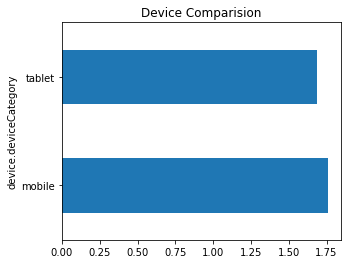

In [26]:
#vertical bar chart
new_graph1=train[(train["device.deviceCategory"]=="mobile")|(train["device.deviceCategory"]=="tablet")]
new_graph1

new_graph1.groupby(["device.deviceCategory"])["visitNumber"].mean().plot.barh(stacked=True, figsize=(5,4))
plt.title("Device Comparision")

In [27]:
#perform t.test
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.power import TTestIndPower

In [28]:
result1=ttest_ind(train[train['device.deviceCategory']=="mobile"]["visitNumber"],train[train['device.deviceCategory']=="tablet"]["visitNumber"],alternative='two-sided', usevar='pooled', value=0)
result1

(0.8620849797444546, 0.38864740177077006, 31107.0)

In [29]:
# t value
t_value1=result1[0]
t_value1

0.8620849797444546

In [30]:
sim_p1=result1[1]
sim_p1

0.38864740177077006

In [31]:
#perform z test

In [32]:
from statsmodels.stats.weightstats import ztest as ztest

result_1=ztest(train[train['device.deviceCategory']=="mobile"]["visitNumber"],train[train['device.deviceCategory']=="tablet"]["visitNumber"],value=0)
result_1

(0.862084979744431, 0.38864075620466765)

In [33]:
# the confidence interval 
from scipy import stats
#the higher limit
mobile_sd=np.std(train[train['device.deviceCategory']=="mobile"]["visitNumber"])
mobile_sample_size=train[train['device.deviceCategory']=="mobile"]["visitNumber"].count()
tablet_sd=np.std(train[train['device.deviceCategory']=="tablet"]["visitNumber"])
tablet_sample_size=train[train['device.deviceCategory']=="tablet"]["visitNumber"].count()
standard_error_1=np.sqrt(pow(mobile_sd,2)/mobile_sample_size+pow(tablet_sd,2)/tablet_sample_size)

higher_limit_1=mean_diff_real+1.96*standard_error_1
higher_limit_1
#the lower limit
lower_limit_1=mean_diff_real-1.96*standard_error_1
lower_limit_1

#test statistics
test_statistics_1=mean_diff_real/standard_error_1
print(f"test statistics is {round(test_statistics_1,3)}")
print(f"the confidence interval for the device category is {(round(lower_limit_1,3),round(higher_limit_1,3))}")

# since  the mean difference 0 is in the cofidence interval, hence we not reject the null hypothesis
print(f"The total visit number between mobile and tablet is quite similar.Hence, we donot reject the null hypothesis")

test statistics is 1.439
the confidence interval for the device category is (-0.026, 0.171)
The total visit number between mobile and tablet is quite similar.Hence, we donot reject the null hypothesis


##  device.browser

`1.` For now the decision will be based on all the data available.  Assuming that the Chrome device is better unless the Firefoc page proves to be definitely better at a Type I error rate of 5%, what is the null and alternative hypotheses then?

$H_0 = μ_{Chrome} = μ_{Firefox}$   <br>
$H_1 = μ_{Chrome} ≠ μ_{Firefox}$      <br>

In [34]:
#The total visits numbers mean for Chrome
mean_Chrome_real = train[train['device.browser']=="Chrome"]["visitNumber"].mean()
mean_Chrome_real

2.4687367472434265

In [35]:
#The total visits numbers mean for Firefox
mean_Firefox_real = train[train['device.browser']=="Firefox"]["visitNumber"].mean()
mean_Firefox_real

3.6124960555380246

In [43]:
#computing the difference between real visit numbers
mean_diff_real1=mean_Chrome_real-mean_Firefox_real
mean_diff_real1

-1.143759308294598

Text(0.5, 1.0, 'Device Broswer Comparision')

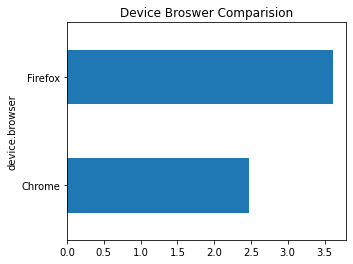

In [44]:
#vertical bar chart

new_graph2=train[(train["device.browser"]=="Chrome")|(train["device.browser"]=="Firefox")]
new_graph2

new_graph2.groupby(["device.browser"])["visitNumber"].mean().plot.barh(stacked=True, figsize=(5,4))
plt.title("Device Broswer Comparision")

In [45]:
result2=ttest_ind(train[train['device.browser']=="Chrome"]["visitNumber"],train[train['device.browser']=="Firefox"]["visitNumber"],alternative='two-sided', usevar='pooled', value=0)
result2

(-6.965826088889043, 3.290352251831131e-12, 78623.0)

In [46]:
# t value
t_value2=result2[0]
t_value2

-6.965826088889043

In [47]:
#p value
sim_p2=result2[1]
sim_p2

3.290352251831131e-12

In [48]:
#peform z test
result_2=ztest(train[train['device.browser']=="Chrome"]["visitNumber"],train[train['device.browser']=="Firefox"]["visitNumber"],value=0)
result_2

(-6.965826088888858, 3.2648225557177677e-12)

In [49]:
# the confidence interval 
#the higher limit
Chrome_sd=np.std(train[train['device.browser']=="Chrome"]["visitNumber"])
Chrome_sample_size=train[train['device.browser']=="Chrome"]["visitNumber"].count()
Firefox_sd=np.std(train[train['device.browser']=="Firefox"]["visitNumber"])
Firefox_sample_size=train[train['device.browser']=="Firefox"]["visitNumber"].count()
standard_error_2=np.sqrt(pow(Chrome_sd,2)/Chrome_sample_size+pow(Firefox_sd,2)/Firefox_sample_size)

higher_limit_2=mean_diff_real1+1.96*standard_error_2
higher_limit_2
#the lower limit
lower_limit_2=mean_diff_real1-1.96*standard_error_2
lower_limit_2

#test statistics
test_statistics_2=mean_diff_real1/standard_error_2
print(f"test statistics is {round(test_statistics_2,3)}")


print(f"the confidence interval for the device brower is {(round(lower_limit_2,3),round(higher_limit_2,3))}")

# since  the value 0 is not in the cofidence interval, hence we  reject the null hypothesis
print(f"The total visit number between mobile and tablet is quite different.Hence, we reject the null hypothesis and accept the alternative hypothesis")

test statistics is -2.233
the confidence interval for the device brower is (-2.148, -0.14)
The total visit number between mobile and tablet is quite different.Hence, we reject the null hypothesis and accept the alternative hypothesis


##  Operating System

`1.` For now the decision will be based on all the data available.  Assuming that the Chrome device is better unless the Firefoc page proves to be definitely better at a Type I error rate of 5%, what is the null and alternative hypotheses then?

$H_0 = μ_{Windows} = μ_{Macintosh}$   <br>
$H_1 = μ_{Windows} ≠ μ_{Macintosh}$      <br>

In [50]:
#The total visits numbers mean for Windows
mean_Windows_real = train[train['device.operatingSystem']=="Windows"]["visitNumber"].mean()
mean_Windows_real

2.6261363964327975

In [51]:
#The total visits numbers mean for Macintosh
mean_Macintosh_real = train[train['device.operatingSystem']=="Macintosh"]["visitNumber"].mean()
mean_Macintosh_real

3.032414657062324

In [52]:
#computing the difference between real visit numbers
mean_diff_real2=mean_Windows_real-mean_Macintosh_real
mean_diff_real2

-0.4062782606295263

Text(0.5, 1.0, 'Device Operating System Comparision')

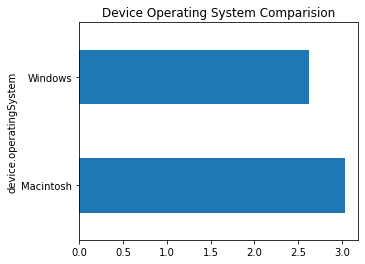

In [53]:
#vertical bar chart

new_graph2=train[(train["device.operatingSystem"]=="Windows")|(train["device.operatingSystem"]=="Macintosh")]
new_graph2

new_graph2.groupby(["device.operatingSystem"])["visitNumber"].mean().plot.barh(stacked=True, figsize=(5,4))
plt.title("Device Operating System Comparision")

In [54]:
result3=ttest_ind(train[train['device.operatingSystem']=="Windows"]["visitNumber"],train[train['device.operatingSystem']=="Macintosh"]["visitNumber"],alternative='two-sided', usevar='pooled', value=0)
result3

(-3.9822117642609167, 6.83570589873858e-05, 60191.0)

In [55]:
# t value
t_value3=result3[0]
t_value3

-3.9822117642609167

In [56]:
# p value
t_value3=result3[1]
t_value3

6.83570589873858e-05

In [57]:
#peform z test
result_3=ztest(train[train['device.operatingSystem']=="Windows"]["visitNumber"],train[train['device.operatingSystem']=="Macintosh"]["visitNumber"], value=0)
result_3

(-3.982211764260946, 6.827690291427366e-05)

In [58]:
# the confidence interval 
#the higher limit

train[train['device.operatingSystem']=="Windows"]["visitNumber"]
train[train['device.operatingSystem']=="Macintosh"]["visitNumber"]

Windows_sd=np.std(train[train['device.operatingSystem']=="Windows"]["visitNumber"])
Windows_sample_size=train[train['device.operatingSystem']=="Windows"]["visitNumber"].count()
Macintosh_sd=np.std(train[train['device.operatingSystem']=="Macintosh"]["visitNumber"])
Macintosh_sample_size=train[train['device.operatingSystem']=="Macintosh"]["visitNumber"].count()
standard_error_3=np.sqrt(pow(Windows_sd,2)/Windows_sample_size+pow(Macintosh_sd,2)/Macintosh_sample_size)

higher_limit_3=mean_diff_real2+1.96*standard_error_3
higher_limit_3
#the lower limit
lower_limit_3=mean_diff_real2-1.96*standard_error_3
lower_limit_3

#test statistics
test_statistics_3=mean_diff_real2/standard_error_3
print(f"test statistics is {round(test_statistics_3,3)}")

print(f"the confidence interval for the device brower is {(round(lower_limit_3,3),round(higher_limit_3,3))}")

# since  the value 0 is not in the cofidence interval, hence we  reject the null hypothesis
print(f"The total visit number between windows and Macintosh is quite different.Hence, we reject the null hypothesis and accept the alternative hypothesis")

test statistics is -4.253
the confidence interval for the device brower is (-0.593, -0.219)
The total visit number between windows and Macintosh is quite different.Hence, we reject the null hypothesis and accept the alternative hypothesis


# Summary<br>

Based on the below calculations, we can obtain the summary:
1. Mobile is quite similar as tablet
2. Firefox browser  is better than Chrome
3. MOS sytem is better than windows

